In [1140]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import  seaborn as sns
from sklearn import metrics

In [1141]:
df = pd.read_csv('GOOG.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [1142]:
df.shape

(1258, 14)

In [1143]:
df = df.drop(columns=[
    'symbol', 'adjClose', 'adjHigh', 'adjLow', 'adjOpen', 'adjVolume', 'divCash', 'splitFactor'
],axis=1)

df.head()

,date,close,high,low,open,volume
0,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065
1,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517
2,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471
3,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357
4,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538


In [1144]:
df.duplicated().sum().any()

False

In [1145]:
df.isnull().values.any()

False

In [1146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1258 non-null   object 
 1   close   1258 non-null   float64
 2   high    1258 non-null   float64
 3   low     1258 non-null   float64
 4   open    1258 non-null   float64
 5   volume  1258 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 59.1+ KB


In [1147]:
df.describe()

,close,high,low,open,volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,1216.317067,1227.430934,1204.176430,1215.260779,1.601590e+06
std,383.333358,387.570872,378.777094,382.446995,6.960172e+05
min,668.260000,672.300000,663.284000,671.000000,3.467530e+05
25%,960.802500,968.757500,952.182500,959.005000,1.173522e+06
50%,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06
75%,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06
max,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06


In [1148]:
# Select only numeric columns for correlation computation
numeric_df = df.select_dtypes(include=['number'])

# Compute and print correlation matrix
print(numeric_df.corr())


           close      high       low      open    volume
close   1.000000  0.999528  0.999586  0.999083 -0.025574
high    0.999528  1.000000  0.999354  0.999575 -0.012470
low     0.999586  0.999354  1.000000  0.999499 -0.035184
open    0.999083  0.999575  0.999499  1.000000 -0.021381
volume -0.025574 -0.012470 -0.035184 -0.021381  1.000000


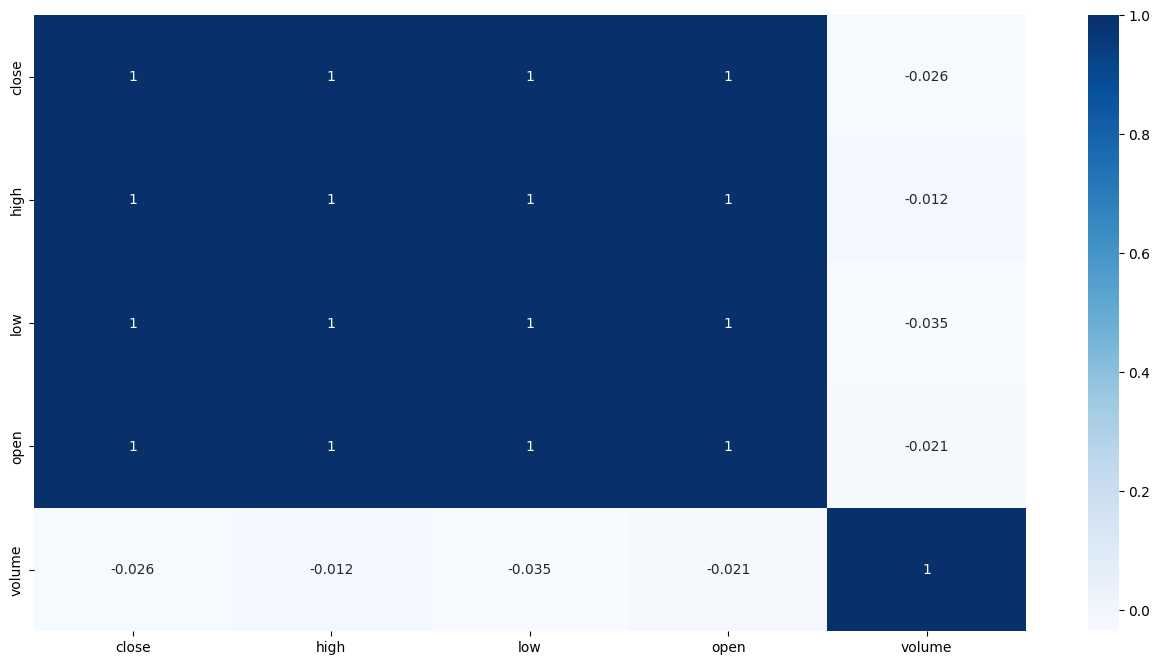

In [1149]:
# Select only numeric columns for correlation computation
numeric_df = df.select_dtypes(include=['number'])

# Create heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(numeric_df.corr(), cmap="Blues", annot=True)
plt.show()


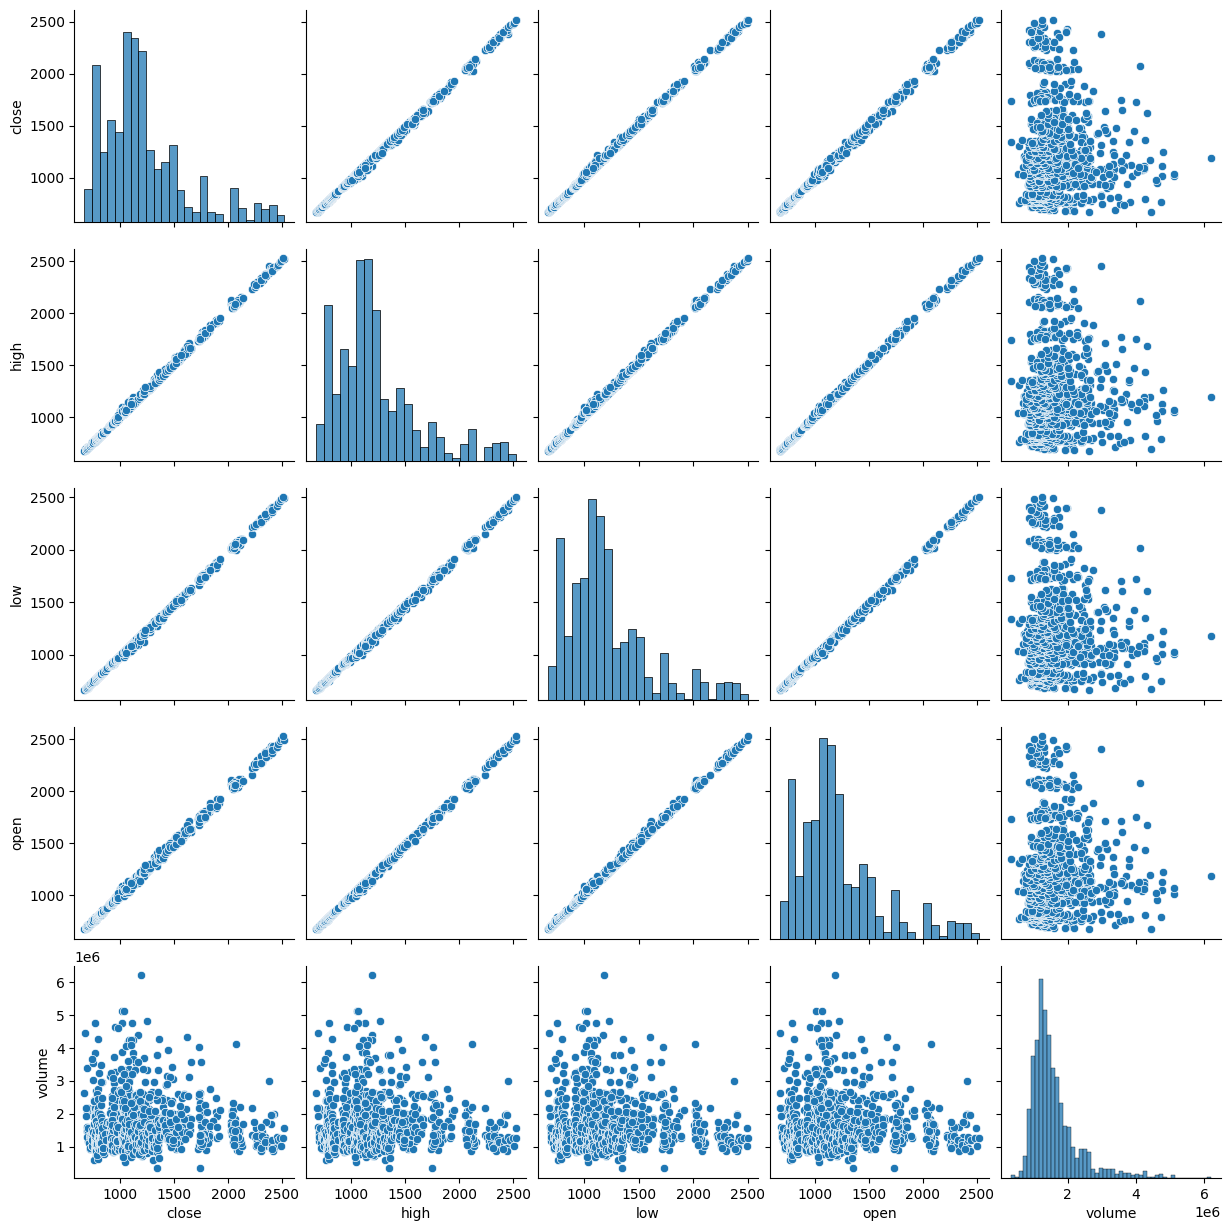

In [1150]:
sns.pairplot(df)

<Axes: >

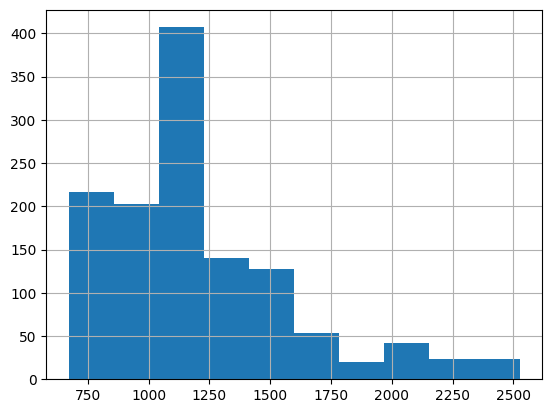

In [1151]:
df['open'].hist()

<Axes: >

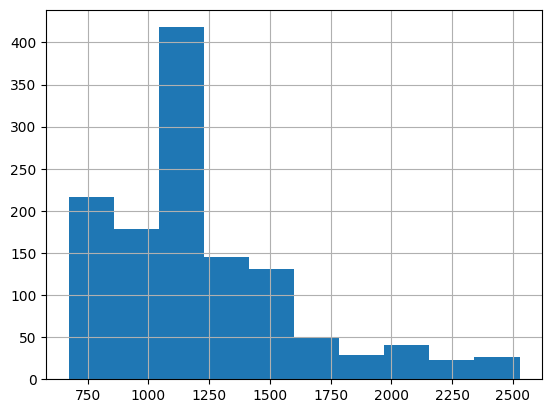

In [1152]:
df['high'].hist()

<Axes: >

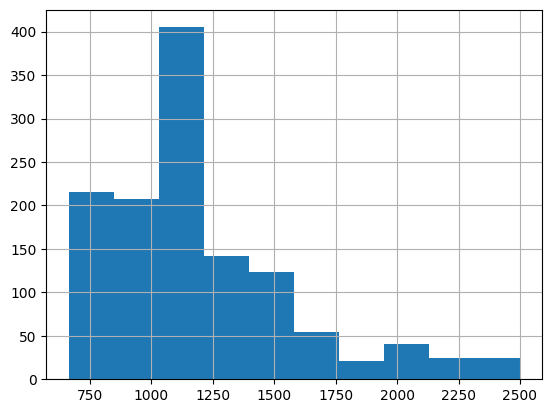

In [1153]:
df['low'].hist()

<Axes: >

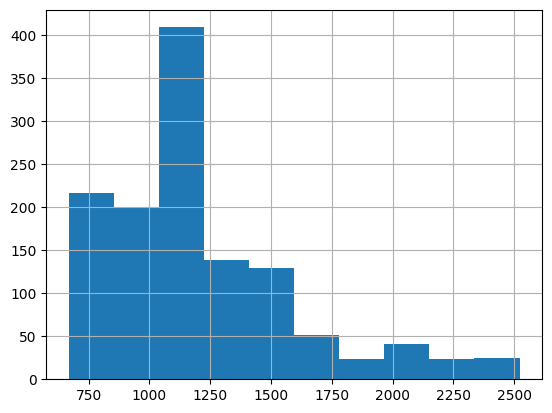

In [1154]:
df['close'].hist()

<Axes: >

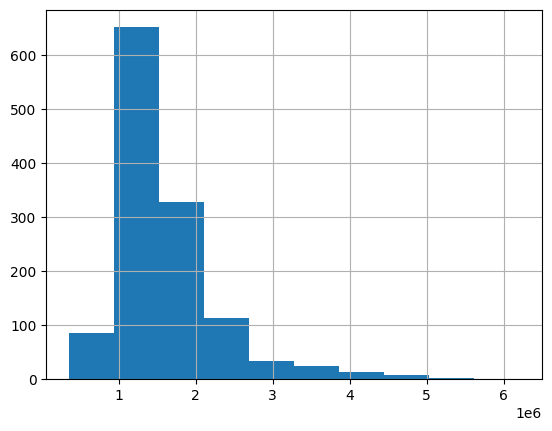

In [1155]:
df['volume'].hist()

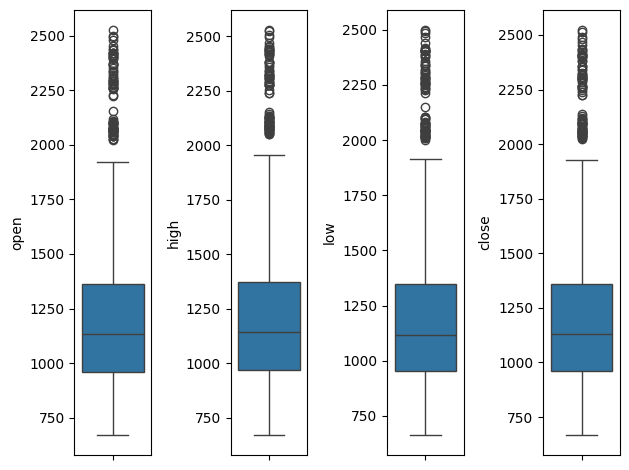

In [1156]:
f, axes = plt.subplots(1,4)
sns.boxplot( y='open', data=df, ax=axes[0])
sns.boxplot( y='high', data=df, ax=axes [1])
sns.boxplot( y='low', data=df, ax=axes[2])
sns.boxplot( y='close', data=df, ax=axes[3])
plt.tight_layout()

In [1157]:
!pip install plotly


In [1158]:
import plotly.graph_objects as go

figure = go.Figure(data=[go.Candlestick(x=df["date"],
                                        open=df["open"], high=df["high"],
                                        low=df ["low"], close=df["close"])])
figure.update_layout(title = "Google Stock Price Analysis", xaxis_rangeslider_visible=False)
figure.show()

In [1159]:
X=df[['open','high','low','volume']].values
y=df['close'].values

In [1160]:
from sklearn.model_selection import train_test_split
# Splitting the data 80% train and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [1161]:
print('Train:',X_train.shape)
print('Test:',X_test.shape)

Train: (1006, 4)
Test: (252, 4)


In [1162]:
!pip install statsmodels


In [1163]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import statsmodels.api as sm
# Creating Regression Model
regressor = LinearRegression()
# fit Linear regression model
model = regressor.fit(X_train, y_train)
# Use model to make predictions
y_pred = regressor.predict(X_test)

In [1164]:
predicted =regressor.predict(X_test)

In [1165]:
predicted.shape

(252,)

In [1166]:
print("model Coefficients:",regressor.coef_)
print("model intercept:",regressor.intercept_)

model Coefficients: [-5.54784375e-01  7.77461854e-01  7.76833889e-01 -4.55059829e-07]
model intercept: 1.4776059634698413


In [1167]:
dframe=pd.DataFrame(y_test,predicted)
dfr=pd.DataFrame({'Actual_price':y_test,'Predicted_price':predicted})
print(dfr)

     Actual_price  Predicted_price
0          695.94       697.302933
1         1084.99      1090.146792
2          769.54       772.628263
3         1349.33      1345.790934
4          843.25       841.900950
..            ...              ...
247       1567.24      1577.560900
248        745.91       741.785159
249       1175.84      1162.560630
250        762.49       766.104077
251       1036.23      1032.660476

[252 rows x 2 columns]


In [1168]:
dfr.describe()

,Actual_price,Predicted_price
count,252.00000,252.000000
mean,1239.92381,1239.673289
std,378.69218,379.364626
min,675.22000,675.546297
25%,1028.45250,1021.774677
50%,1163.42500,1158.541487
75%,1428.65000,1429.116931
max,2411.56000,2419.701570


C:\Users\katiy\AppData\Local\Temp\ipykernel_18756\1301322458.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: ylabel='Density'>

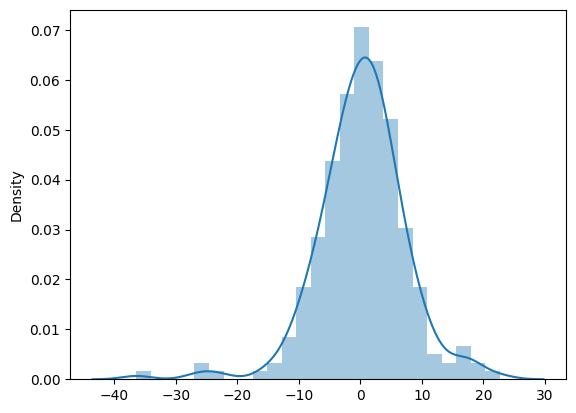

In [1169]:
residual=y_test-predicted
sns.distplot(residual)

In [1170]:
import scipy.stats
p_value=scipy.stats.norm.sf(abs(1.67))
print('p value is: '+str(p_value))

p value is: 0.04745968180294733


In [1171]:
import statsmodels.api as sm

# Fit the OLS regression model
results = sm.OLS(y_test, X_test).fit()

# Get the summary of the regression results
summary = results.summary()

# Print or use the summary as needed
print(summary)


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.090e+06
Date:                Fri, 10 May 2024   Prob (F-statistic):                        0.00
Time:                        01:07:48   Log-Likelihood:                         -850.12
No. Observations:                 252   AIC:                                      1708.
Df Residuals:                     248   BIC:                                      1722.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [1172]:
from sklearn.metrics import confusion_matrix,accuracy_score
regression_confidence =regressor.score(X_test,y_test)
print("Linear regression confidence:",regression_confidence)

Linear regression confidence: 0.9996411863249157


In [1173]:
import math

print('Mean Absolute Error:', metrics.mean_absolute_error (y_test,predicted))
print('Mean Squared Error:', metrics.mean_squared_error (y_test, predicted))
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error (y_test,predicted)))


Mean Absolute Error: 5.170018962750284
Mean Squared Error: 51.2524748066784
Root Mean Squared Error: 7.159083377547604


In [1174]:
x2 = abs(predicted - y_test)
y2 = 100 * (x2 / y_test)
accuracy = 100 - np.mean (y2)
print( 'Accuracy: ', round (accuracy, 2), '%.')

Accuracy:  99.59 %.


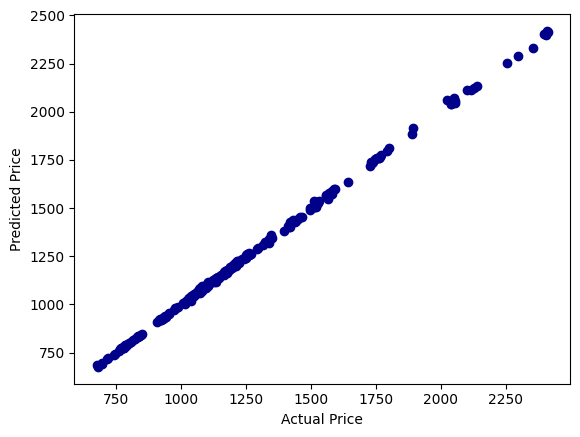

In [1175]:
plt.scatter(dfr.Actual_price, dfr.Predicted_price, color='darkblue')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()


<Axes: >

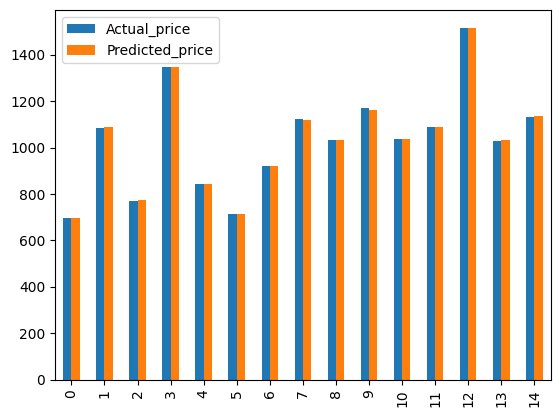

In [1176]:
graph=dfr.head(15)
graph.plot(kind='bar')